In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def ImRead(name, extension, show = True):
    result = cv2.imread(name + '.' + extension)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    if show:
        ImShow(result, title=name)
    return result

def ImShow(I, title = None):
    plt.figure(figsize=(1.5,1.5), dpi=200)
    plt.imshow(I, 'gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

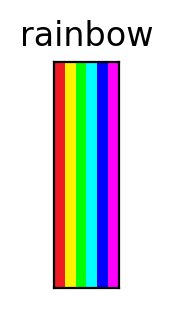

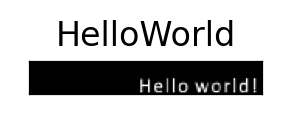

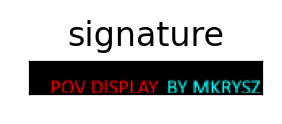

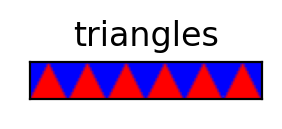

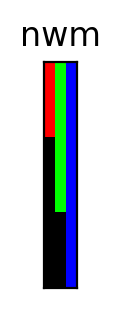

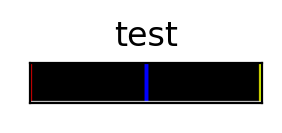

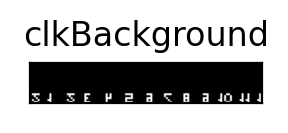

In [21]:
rainbow = ImRead('rainbow', 'png')
HelloWorld = ImRead('HelloWorld', 'png')
signature = ImRead('signature', 'png')
triangles = ImRead("triangles", "png")
nwm = ImRead("nwm", "png")
test = ImRead("test", "png")
clkBackground = ImRead("clkBackground", "png")

In [22]:
def binarization(img, threshold):
    result = img > threshold
    result = result.astype(np.uint8)
    # result *= 255
    return result

def RGB_Binarization(image, thr):
    thr_r, thr_g, thr_b = thr
    R = binarization(image[:,:,0], thr_r)
    G = binarization(image[:,:,1], thr_g)
    B = binarization(image[:,:,2], thr_b)
    return np.array([G,R,B], dtype=np.uint8)



In [23]:
def compileImage(image):
    result = []
    for i in range(image.shape[2]):
        result.append(compileColumn(image[:,:,i]))
    return result

def compileColumn(col):
    temp = ''

    for i in range(col.shape[1]):
        for color in col[:,i]:
            temp += str(color)
    return temp

def convertToC(compiledImage):
    bufferSize = len(compiledImage[0])//8+1
    result = ""
    result += "#define IMG_SIZE " + str(len(compiledImage)) + '\n\n'
    result += "const uint8_t image[" + str(len(compiledImage)) + "][" + str(bufferSize) + "] = {\n"
    for col in compiledImage:
        result += "{"
        buffer = []
        for i in range(bufferSize):
            temp0 = col[i*8:(i+1)*8]
            if len(temp0) == 7:
                temp0 = '0' + temp0
            temp0 = temp0[1:] + temp0[0]
            buffer.append(temp0)
        buffer.reverse()
        for idx, temp in enumerate(buffer):
            if idx == 0:
                temp = temp[1:] + temp[0]
                # temp = temp[::-1]
            result += '0b' + temp + ', '
        result = result[0:-2] + "},\n"
    result = result[:-2]
    result += "\n};"
    return result

        

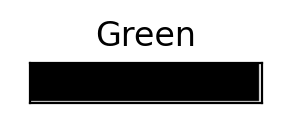

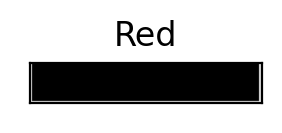

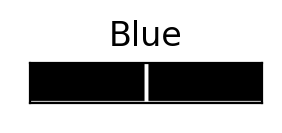

#define IMG_SIZE 120

const uint8_t image[120][8] = {
{0b01011100, 0b10010010, 0b00100101, 0b01001000, 0b10010010, 0b00100101, 0b01001000, 0b10010010},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b00000000},
{0b00011100, 0b00000000, 0b00000000, 0b00000000, 0b00000000, 0b0

In [24]:

img = test

binImg = RGB_Binarization(img, (100,100,100))

colorNames = ["Green", "Red", "Blue"]
for i, color in enumerate(binImg):
    ImShow(color, title=colorNames[i])

comImg = compileImage(binImg)
print(convertToC(comImg))